Kemal Demirel

191104091

HW2- SORU1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1-Load a gray scale image

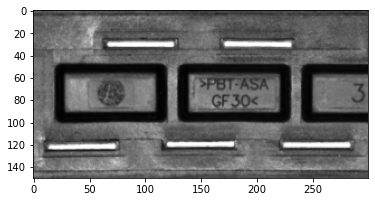

In [2]:
gray_scale_image = cv2.imread('connectors.png', 0)
plt.imshow(gray_scale_image, cmap='gray')
plt.show()

## 2- Implement a 2D Gaussian Kernel with size 5*5 and sigma = 1.0. Kernel normalized therefore its sum equals to 1.

In [3]:
def gaussianKernel2D(sigma, kernel_size):
    grid = np.arange(-kernel_size // 2 + 1., kernel_size // 2 + 1.)
    x, y = np.meshgrid(grid, grid)
    gaussian_kernel = np.exp(-(x**2 + y**2) / (2. * sigma**2)) / (2. * np.pi * sigma**2)
    gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel)
    return gaussian_kernel    

## 3-Convolve the image with the Gaussian kernel using a sliding window approach. Do not use any libraries for convolution.

In [4]:
pad_size = 5 // 2
padded_image = np.pad(gray_scale_image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')

Filtered image with zeros is created

In [5]:
filtered_img = np.zeros_like(gray_scale_image)

Apply gaussian filter to the image with sigma=1.0 and kernel_size=5*5

In [10]:
gaussian_kernel = gaussianKernel2D(1.0, 5)

In [7]:
for i in range(pad_size, gray_scale_image.shape[0] + pad_size):
    for j in range(pad_size, gray_scale_image.shape[1] + pad_size):
        window = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
        filtered_img[i - pad_size, j - pad_size] = np.sum(window * gaussian_kernel)

Compare images

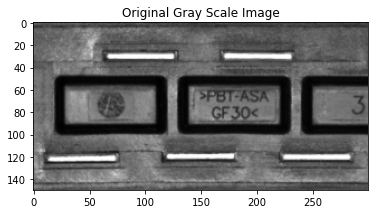

In [8]:
plt.imshow(gray_scale_image, cmap='gray')
plt.title('Original Gray Scale Image')
plt.show()

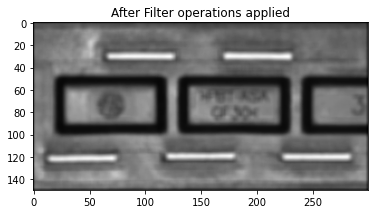

In [11]:
plt.imshow(filtered_img, cmap='gray')
plt.title('After Filter operations applied')
plt.show()

## 4 - Apply subsampling to the filtered image by taking every other pixel along both dimensions (Hint: subsampled_img[i, j] = img[i*factor, j*factor]

In [25]:
factor = 2
subsampled_img = np.zeros((filtered_img.shape[0] // factor, filtered_img.shape[1] // factor))
for i in range(subsampled_img.shape[0]):
    for j in range(subsampled_img.shape[1]):
        subsampled_img[i, j] = filtered_img[i * factor, j * factor]

Image displayed

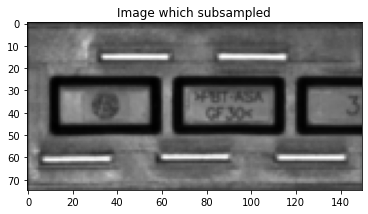

In [26]:
plt.imshow(subsampled_img, cmap='gray')
plt.title('Image which subsampled')
plt.show()


## 5- Repeat steps 2-4 three more times with increasing sigma values of 2.0, 3.0, and 4.0 to obtain a sequence of downsampled images with increasing levels of blurring.

In [27]:
def repeat_step_2_4(sigma):
    pad_size = 5 // 2
    padded_image = np.pad(gray_scale_image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    filtered_img = np.zeros_like(gray_scale_image)
    gaussian_kernel = gaussianKernel2D(sigma, 5)
    for i in range(pad_size, gray_scale_image.shape[0] + pad_size):
        for j in range(pad_size, gray_scale_image.shape[1] + pad_size):
            window = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            filtered_img[i - pad_size, j - pad_size] = np.sum(window * gaussian_kernel)
    factor = 2
    subsampled_img = np.zeros((filtered_img.shape[0] // factor, filtered_img.shape[1] // factor))
    for i in range(subsampled_img.shape[0]):
        for j in range(subsampled_img.shape[1]):
            subsampled_img[i, j] = filtered_img[i * factor, j * factor]
    return subsampled_img

Apply step 2-4 for sigma values 2.0, 3.0, 4.0

In [28]:
sigma_2_image = repeat_step_2_4(2.0)
sigma_3_image = repeat_step_2_4(3.0)
sigma_4_image = repeat_step_2_4(4.0)

## 6- Display the original image and the sequence of downsampled images side by side for comparison.

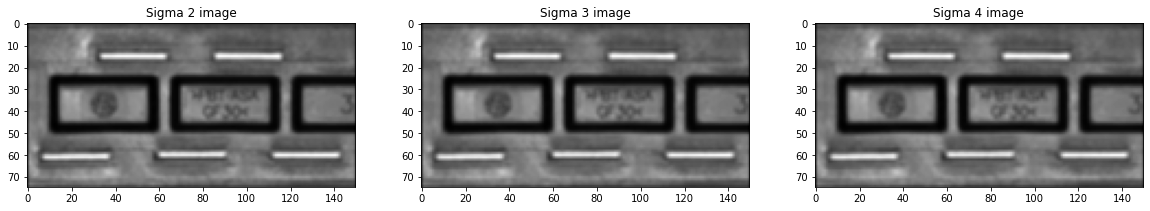

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(sigma_2_image, cmap='gray')
axs[0].set_title('Sigma 2 image')
axs[1].imshow(sigma_3_image, cmap='gray')
axs[1].set_title('Sigma 3 image')
axs[2].imshow(sigma_4_image, cmap='gray')
axs[2].set_title('Sigma 4 image')
plt.show()

## 7- Observe the effects of the sigma change on the output image and report it.

RAPOR